In [125]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
from sklearn import metrics
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split


# Common imports
import numpy as np
import pandas as pd
import os


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [127]:
brain.dtypes


age                  float64
hypertension         float64
heart_disease        float64
avg_glucose_level    float64
bmi                  float64
smoking_status       float64
stroke               float64
dtype: object

In [128]:
brain = pd.read_csv('C:/Users/pavan/Desktop/dataset/F21DL-main/brain_stroke_in_numeric_without_useless_data.csv')
brain = brain.drop(brain.columns[0], axis=1)
brain_pca = pd.read_csv('C:/Users/pavan/Desktop/dataset/F21DL-main/brain_stroke_after_pca.csv')
brain_pca = brain_pca.drop(brain_pca.columns[0], axis=1) 
print(brain)

      gender   age  hypertension  heart_disease  ever_married  \
0          0  67.0             0              1             1   
1          0  80.0             0              1             1   
2          1  49.0             0              0             1   
3          1  79.0             1              0             1   
4          0  81.0             0              0             1   
...      ...   ...           ...            ...           ...   
4976       0  41.0             0              0             0   
4977       0  40.0             0              0             1   
4978       1  45.0             1              0             1   
4979       0  40.0             0              0             1   
4980       1  80.0             1              0             1   

      avg_glucose_level   bmi  smoking_status  stroke  
0                228.69  36.6               2       1  
1                105.92  32.5               1       1  
2                171.23  34.4               3      

In [129]:
brain = brain.drop(brain.columns[0], axis=1)

In [130]:
brain['hypertension'] = brain['hypertension'].astype(float)
brain['heart_disease'] = brain['heart_disease'].astype(float)
brain['ever_married'] = brain['ever_married'].astype(float)
brain['stroke'] = brain['stroke'].astype(float)
brain['smoking_status'] = brain['smoking_status'].astype(float)

In [131]:
brain.dtypes

age                  float64
hypertension         float64
heart_disease        float64
ever_married         float64
avg_glucose_level    float64
bmi                  float64
smoking_status       float64
stroke               float64
dtype: object

In [132]:
brain = brain.drop('ever_married',axis=1)

In [133]:
brain2 = brain.copy()

In [134]:
brain.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0.0,1.0,228.69,36.6,2.0,1.0
1,80.0,0.0,1.0,105.92,32.5,1.0,1.0
2,49.0,0.0,0.0,171.23,34.4,3.0,1.0
3,79.0,1.0,0.0,174.12,24.0,1.0,1.0
4,81.0,0.0,0.0,186.21,29.0,2.0,1.0


In [135]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

Text(0.5, 1.03, 'age vs. features')

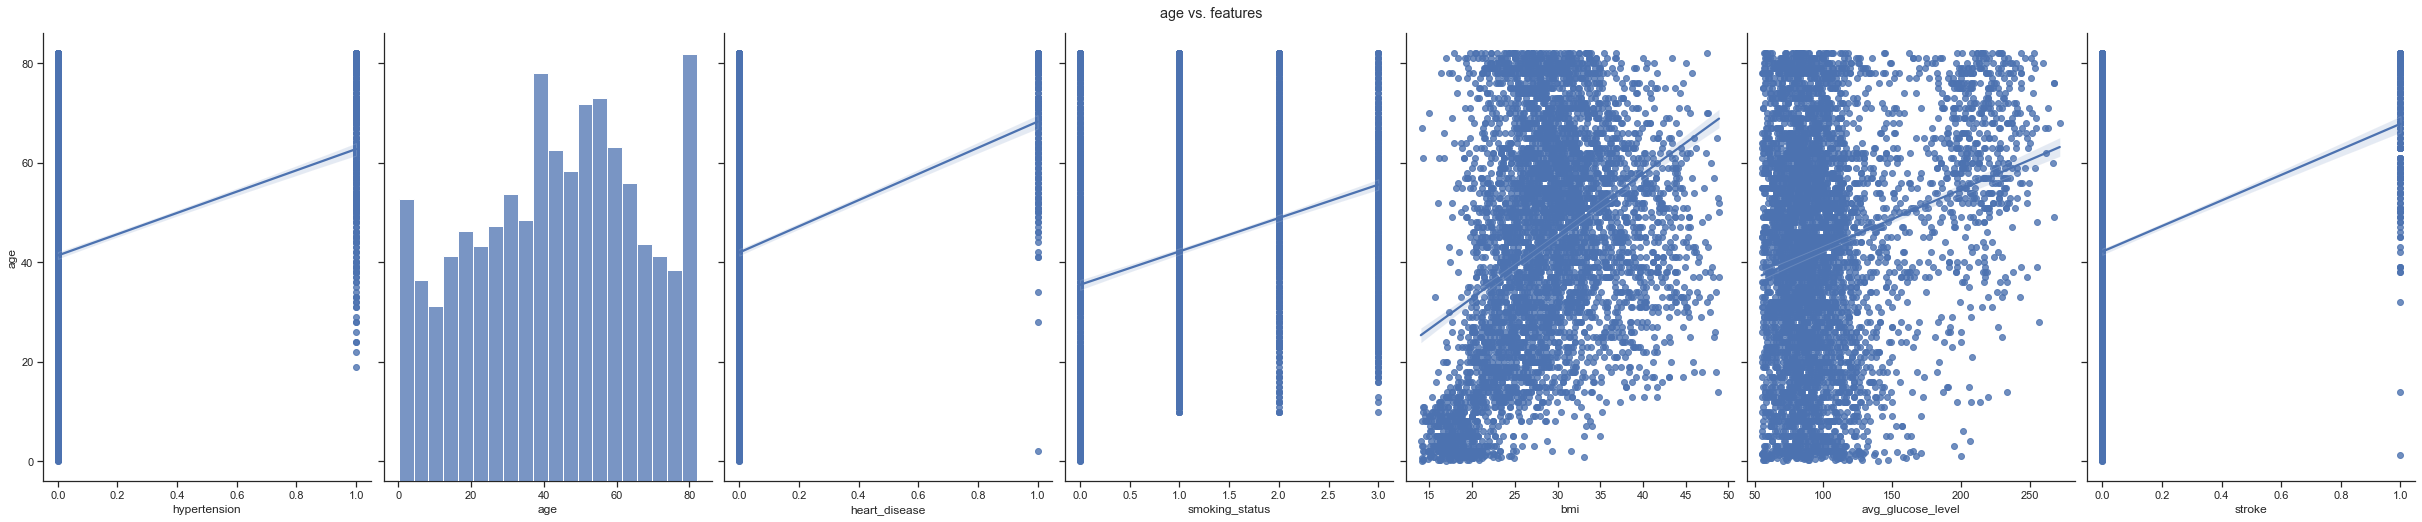

In [136]:
ax_pairs = sns.pairplot(brain2, x_vars=['hypertension','age','heart_disease','smoking_status'
                                   ,'bmi','avg_glucose_level','stroke'], 
                         y_vars='age', height=7, aspect=0.7, kind='reg')

ax_pairs.fig.suptitle('age vs. features', y=1.03)

In [137]:
from sklearn.model_selection import train_test_split
# Creating independent and dependent variables
X = brain.drop('stroke',axis=1)
y = brain['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (3984, 6), (3984,)
Train Data: (997, 6), (997,)


In [138]:
##Linear regression


In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
regr_tr = LinearRegression()  
regr_tr.fit(X_train, y_train)

LinearRegression()

In [141]:
y_pred_lr_tr = regr_tr.predict(X_train)

In [142]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [143]:
mse_tr = mean_squared_error(y_true=y_train,y_pred=y_pred_lr_tr)
print("MSE:",mse_tr)

MSE: 0.044020366195143816


array([[<AxesSubplot:xlabel='hypertension', ylabel='hypertension'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='hypertension'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='hypertension'>,
        <AxesSubplot:xlabel='bmi', ylabel='hypertension'>,
        <AxesSubplot:xlabel='smoking_status', ylabel='hypertension'>,
        <AxesSubplot:xlabel='stroke', ylabel='hypertension'>],
       [<AxesSubplot:xlabel='hypertension', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='bmi', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='smoking_status', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='stroke', ylabel='heart_disease'>],
       [<AxesSubplot:xlabel='hypertension', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='avg_glucose_le

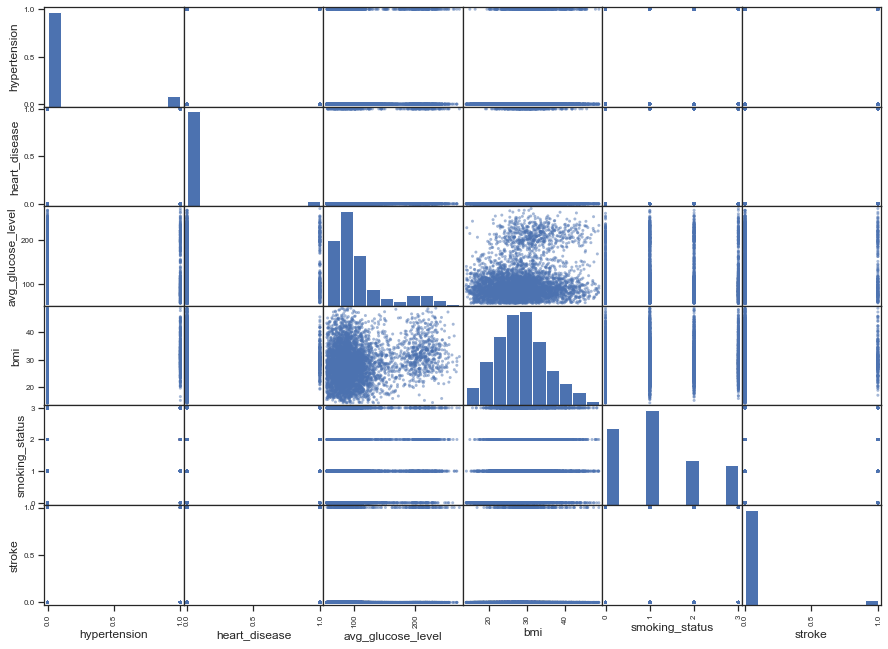

In [144]:
pd.plotting.scatter_matrix(brain.iloc[:,1:8], figsize=(15,11))

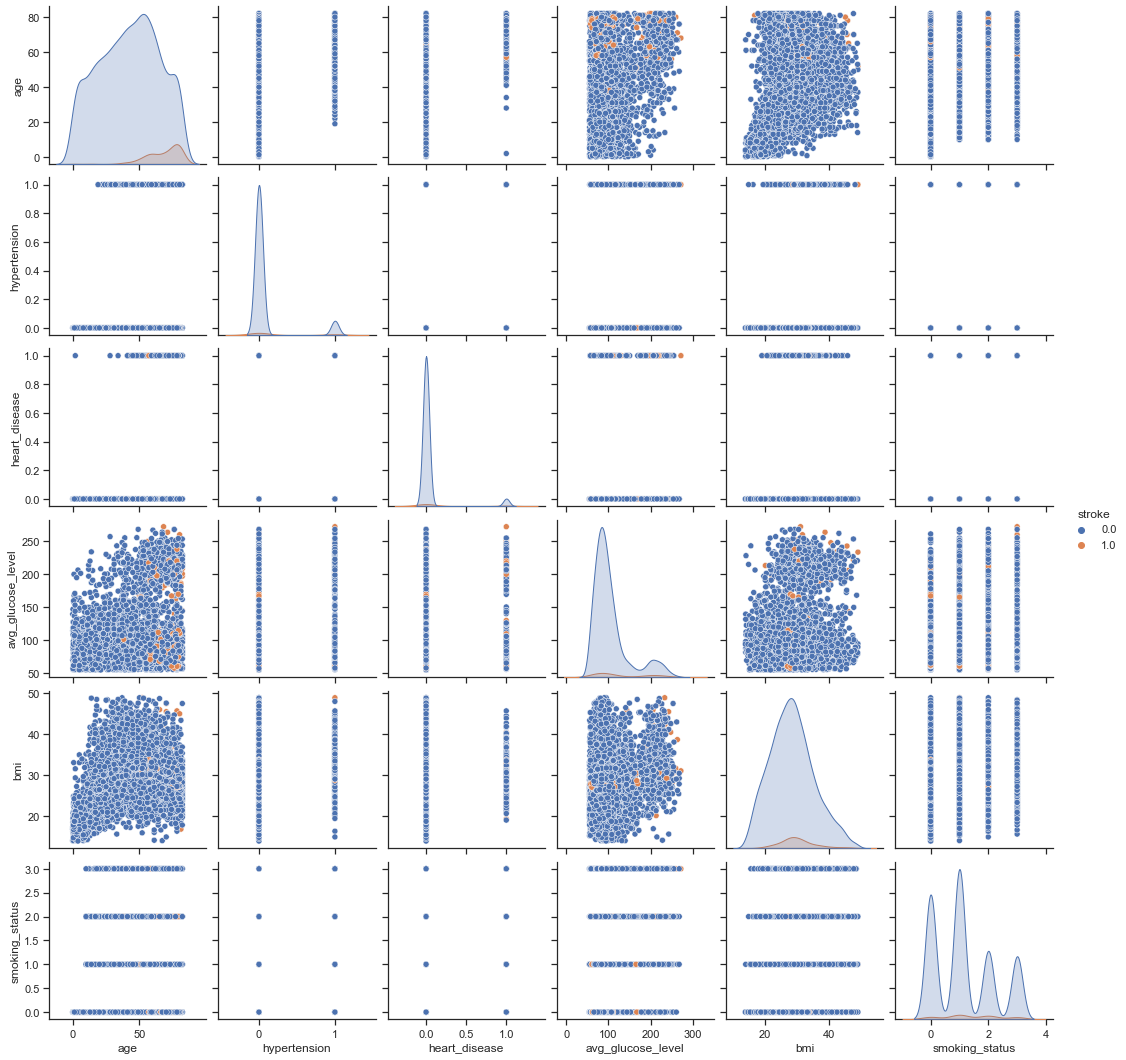

In [145]:
sns.set_theme(style="ticks")
sns.pairplot(brain, hue='stroke')

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='hypertension', ylabel='age'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='age'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='smoking_status', ylabel='age'>,
        <AxesSubplot:xlabel='stroke', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='hypertension'>,
        <AxesSubplot:xlabel='hypertension', ylabel='hypertension'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='hypertension'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='hypertension'>,
        <AxesSubplot:xlabel='bmi', ylabel='hypertension'>,
        <AxesSubplot:xlabel='smoking_status', ylabel='hypertension'>,
        <AxesSubplot:xlabel='stroke', ylabel='hypertension'>],
       [<AxesSubplot:xlabel='age', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='hypertension', ylabel='heart_disease'>,
        <Axe

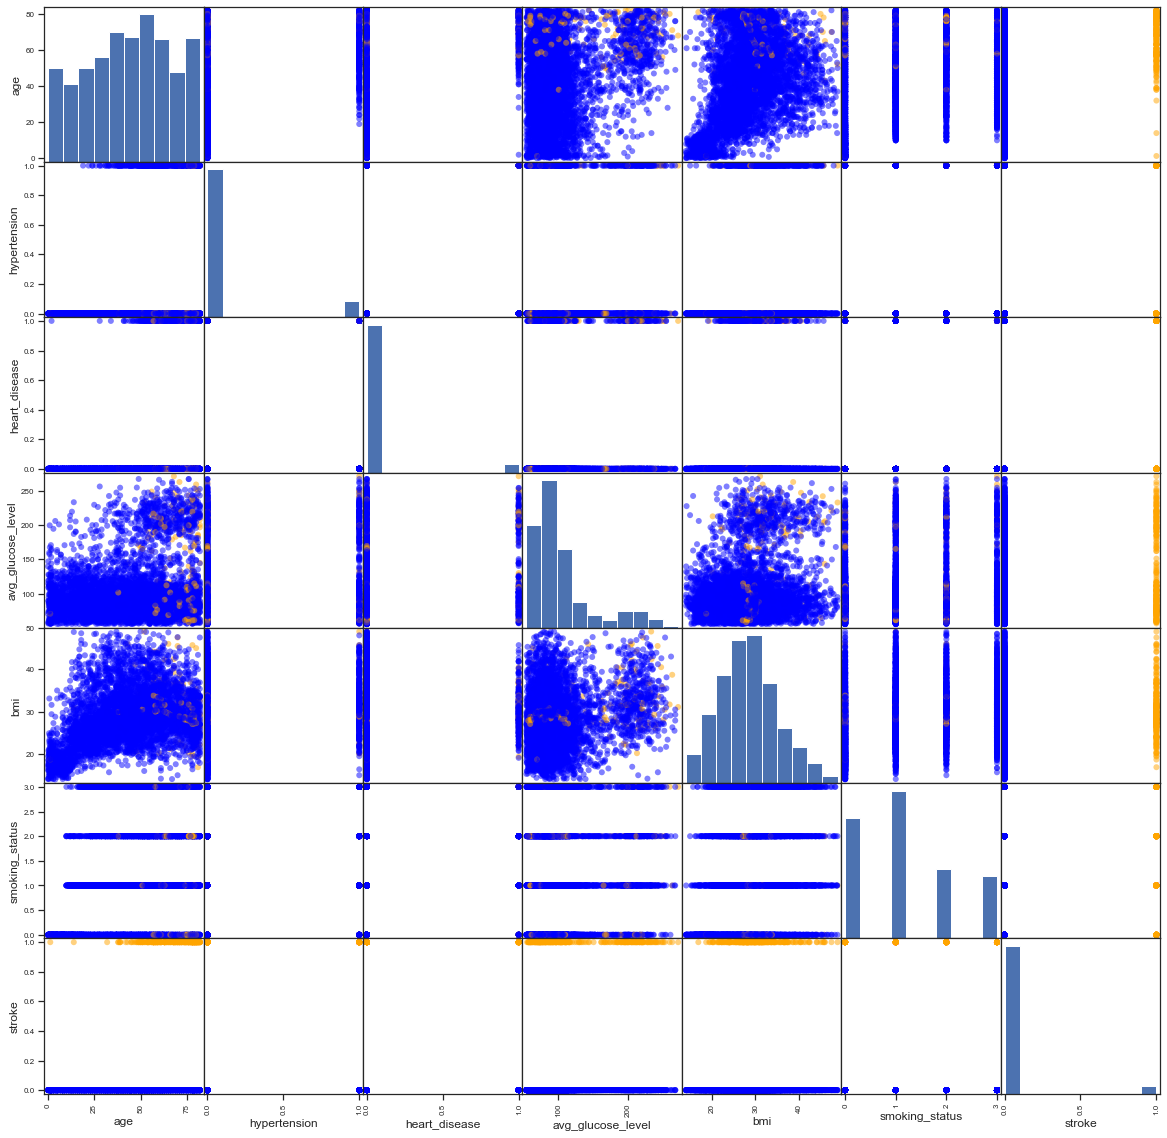

In [146]:
val = brain['stroke'].unique()
colors = {val[0]:'orange', val[1]:'blue'}
pd.plotting.scatter_matrix(brain,figsize=(20,20),grid=True,
                           marker='o', c= brain['stroke'].map(colors))

In [147]:
brain.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0.0,1.0,228.69,36.6,2.0,1.0
1,80.0,0.0,1.0,105.92,32.5,1.0,1.0
2,49.0,0.0,0.0,171.23,34.4,3.0,1.0
3,79.0,1.0,0.0,174.12,24.0,1.0,1.0
4,81.0,0.0,0.0,186.21,29.0,2.0,1.0


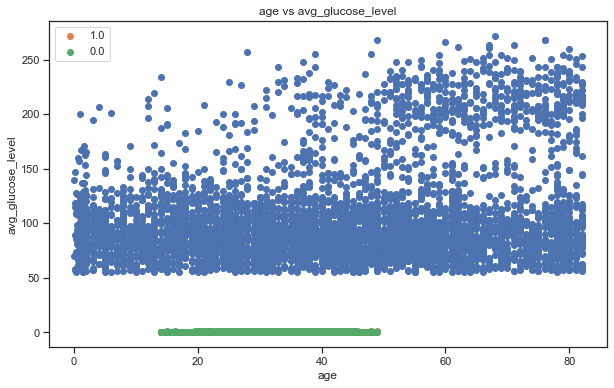

In [148]:
plt.figure(figsize=(10,6))
values = brain['stroke'].unique()
colors = ['b','r','g']
label = brain.stroke
plt.scatter(brain.iloc[:,0], brain.iloc[:,3])
plt.title('age vs avg_glucose_level')
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
for i in range(0,2):
    bucket = brain[brain['stroke'] == values[i]]
    bucket = bucket.iloc[:,[1,4]].values
    plt.scatter(bucket[:, 1], bucket[:, 0], label=values[i]) 
plt.legend()
plt.show()

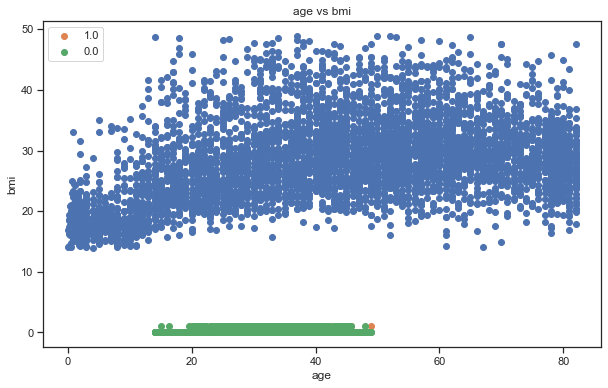

In [149]:
plt.figure(figsize=(10,6))
values = brain['stroke'].unique()
colors = ['b','r','g']
label = brain.stroke
plt.scatter(brain.iloc[:,0], brain.iloc[:,4])
plt.title('age vs bmi')
plt.xlabel('age')
plt.ylabel('bmi')
for i in range(0,2):
    bucket = brain[brain['stroke'] == values[i]]
    bucket = bucket.iloc[:,[1,4]].values
    plt.scatter(bucket[:, 1], bucket[:, 0], label=values[i]) 
plt.legend()
plt.show()

In [150]:
from scipy.spatial import ConvexHull

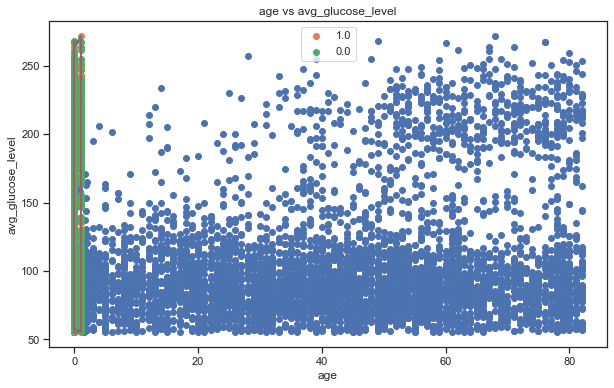

In [151]:
plt.figure(figsize=(10,6))
values = brain['stroke'].unique()
colors = ['b','r','g']
label = brain.stroke
plt.scatter(brain.iloc[:,0], brain.iloc[:,3])
plt.title('age vs avg_glucose_level')
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
for i in range(0,2):
    bucket = brain[brain['stroke'] == values[i]]
    bucket = bucket.iloc[:,[1,3]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=values[i]) 
    for j in hull.simplices:
        plt.plot(bucket[j,0], bucket[j,1], colors[i])    
plt.legend()
plt.show()

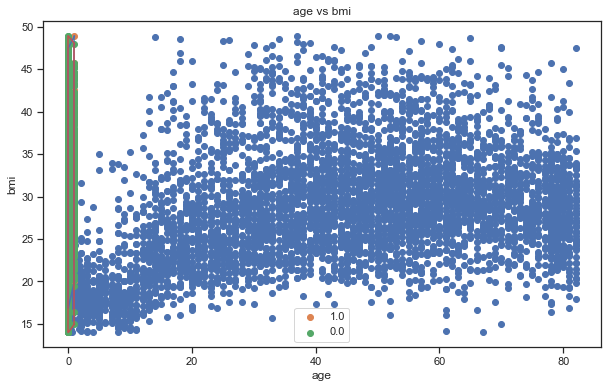

In [152]:
plt.figure(figsize=(10,6))
values = brain['stroke'].unique()
colors = ['b','r','g']
label = brain.stroke
plt.scatter(brain.iloc[:,0], brain.iloc[:,4])
plt.title('age vs bmi')
plt.xlabel('age')
plt.ylabel('bmi')
for i in range(0,2):
    bucket = brain[brain['stroke'] == values[i]]
    bucket = bucket.iloc[:,[1,4]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=values[i]) 
    for j in hull.simplices:
        plt.plot(bucket[j,0], bucket[j,1], colors[i])    
plt.legend()
plt.show()

In [153]:
regr = LinearRegression()  
regr.fit(X_train, y_train)

LinearRegression()

In [154]:
y_pred_lr = regr.predict(X_test)

In [155]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_lr)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred_lr) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred_lr,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.09664024450568291
MSE: 0.04264493962719337
RMSE: 0.20650651231182365


In [156]:
regr.coef_

array([ 0.0021042 ,  0.02676439,  0.06157481,  0.00043826, -0.00130016,
       -0.00429877])

In [157]:
##SVM

In [158]:
from sklearn.svm import SVC

In [159]:
svc = SVC()  
svc.fit(X_train, y_train)

SVC()

In [160]:
y_pred_svc = svc.predict(X_test)

In [161]:
mse_svc = mean_squared_error(y_true=y_test,y_pred=y_pred_svc) #default=True
print("MSE:",mse_svc)

MSE: 0.048144433299899696


In [162]:
from sklearn.linear_model import SGDClassifier

In [163]:
sgd = SGDClassifier()  
sgd.fit(X_train, y_train)

SGDClassifier()

In [164]:
y_pred_sgd = sgd.predict(X_test)

In [165]:
mse_sgd = mean_squared_error(y_true=y_test,y_pred=y_pred_sgd) #default=True
print("MSE:",mse_sgd)

MSE: 0.048144433299899696


In [166]:
##logicstic regression

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
log_tr  = LogisticRegression()
log_tr.fit(X_train, y_train)

LogisticRegression()

In [169]:
y_pred_log_tr = log_tr.predict(X_train)

In [170]:
mse_log_lr = mean_squared_error(y_true=y_train,y_pred=y_pred_log_tr)
print("MSE:",mse_log_lr)

MSE: 0.050200803212851405


In [171]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [172]:
y_pred_log = log.predict(X_test)

In [173]:
mse_log = mean_squared_error(y_true=y_test,y_pred=y_pred_log) #default=True
print("MSE:",mse_log)

MSE: 0.048144433299899696


In [174]:
from sklearn.metrics import accuracy_score

In [175]:
print(f"Accuracy of the classifier is:: {accuracy_score(y_test, y_pred_log)}")

Accuracy of the classifier is:: 0.9518555667001003


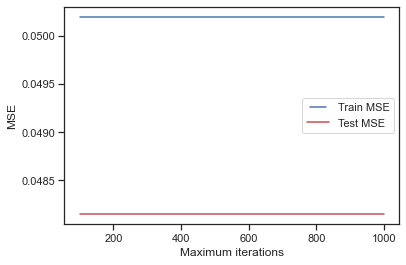

In [180]:
max_depths = np.linspace(100, 1000, 1000, endpoint=True).astype(int)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = LogisticRegression(max_iter=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    mse_tr = mean_squared_error(y_true=y_train,y_pred=train_pred)
    # Add to previous train results
    train_results.append(mse_tr)
    
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_true=y_test,y_pred= y_pred)
    # Add to previous test results
    test_results.append(mse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train MSE")
line2, = plt.plot(max_depths, test_results, 'r', label="Test MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("MSE")
plt.xlabel("Maximum iterations")
plt.show()

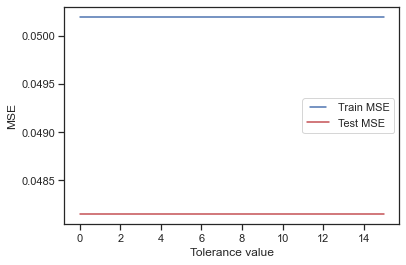

In [181]:
max_depths = np.linspace(0.001, 15, 15, endpoint=True).astype(int)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = LogisticRegression(tol =max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    mse_tr = mean_squared_error(y_true=y_train,y_pred=train_pred)
    # Add to previous train results
    train_results.append(mse_tr)
    
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_true=y_test,y_pred= y_pred)
    # Add to previous test results
    test_results.append(mse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train MSE")
line2, = plt.plot(max_depths, test_results, 'r', label="Test MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("MSE")
plt.xlabel("Tolerance value")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

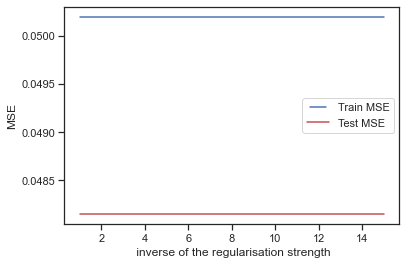

In [182]:
max_depths = np.linspace(1, 15, 15, endpoint=True).astype(int)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = LogisticRegression(C =max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    mse_tr = mean_squared_error(y_true=y_train,y_pred=train_pred)
    # Add to previous train results
    train_results.append(mse_tr)
    
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_true=y_test,y_pred= y_pred)
    # Add to previous test results
    test_results.append(mse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train MSE")
line2, = plt.plot(max_depths, test_results, 'r', label="Test MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("MSE")
plt.xlabel(" inverse of the regularisation strength")
plt.show()

In [183]:
##gridsearchcv

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
params = {'penalty':['l1' ,'l2', 'elasticnet', 'none']}
grid_search_cv = GridSearchCV(LogisticRegression(), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueE

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=1)

In [186]:
grid_search_cv.best_estimator_

LogisticRegression()

In [187]:
params2 = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [188]:
grid_search_cv2 = GridSearchCV(LogisticRegression(), params2, verbose=1, cv=3)
grid_search_cv2.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [189]:
grid_search_cv2.best_estimator_

LogisticRegression(solver='newton-cg')

In [190]:
params3 = {'multi_class':['auto', 'ovr', 'multinomial']}

In [191]:
grid_search_cv3 = GridSearchCV(LogisticRegression(), params3, verbose=1, cv=3)
grid_search_cv3.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial']},
             verbose=1)

In [192]:
grid_search_cv3.best_estimator_

LogisticRegression()

In [193]:
params4 = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'multi_class':['auto', 'ovr', 'multinomial']}

In [194]:
grid_search_cv4 = GridSearchCV(LogisticRegression(), params4, verbose=1, cv=3)
grid_search_cv4.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [195]:
grid_search_cv4.best_estimator_

LogisticRegression(solver='newton-cg')

In [196]:
params5 = {'penalty':['l1' ,'l2', 'elasticnet', 'none'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'multi_class':['auto', 'ovr', 'multinomial']}

In [198]:
grid_search_cv5 = GridSearchCV(LogisticRegression(), params5, verbose=1, cv=3)
grid_search_cv5.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [199]:
grid_search_cv5.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

In [200]:
log_opt1 = LogisticRegression(penalty = 'l1', solver = 'liblinear')

In [201]:
log_opt1.fit(X_train, y_train)
y_pred_log_opt = log_opt1.predict(X_test)

In [202]:
mse_log_opt = mean_squared_error(y_true=y_test,y_pred=y_pred_log_opt)
print("MSE:",mse_log_opt)

MSE: 0.048144433299899696


In [203]:
log_opt2 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 8)

In [204]:
log_opt2.fit(X_train, y_train)
y_pred_log_opt2 = log_opt2.predict(X_test)

In [205]:
mse_log_opt2 = mean_squared_error(y_true=y_test,y_pred=y_pred_log_opt2)
print("MSE:",mse_log_opt2)

MSE: 0.048144433299899696


In [206]:
log_opt3 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 8, max_iter = 200)

In [207]:
log_opt3.fit(X_train, y_train)
y_pred_log_opt3 = log_opt3.predict(X_test)

In [208]:
mse_log_opt3 = mean_squared_error(y_true=y_test,y_pred=y_pred_log_opt3)
print("MSE:",mse_log_opt3)

MSE: 0.048144433299899696


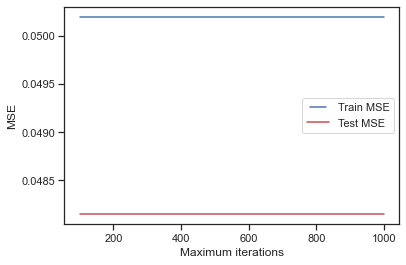

In [209]:
max_depths = np.linspace(100, 1000, 1000, endpoint=True).astype(int)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = LogisticRegression(solver = 'liblinear',max_iter=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    mse_tr = mean_squared_error(y_true=y_train,y_pred=train_pred)
    # Add to previous train results
    train_results.append(mse_tr)
    
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_true=y_test,y_pred= y_pred)
    # Add to previous test results
    test_results.append(mse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train MSE")
line2, = plt.plot(max_depths, test_results, 'r', label="Test MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("MSE")
plt.xlabel("Maximum iterations")
plt.show()

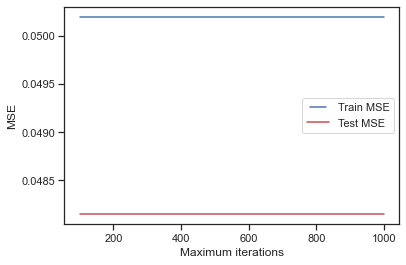

In [210]:
max_depths = np.linspace(100, 1000, 1000, endpoint=True).astype(int)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = LogisticRegression(penalty = 'l1',solver = 'liblinear',max_iter=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    mse_tr = mean_squared_error(y_true=y_train,y_pred=train_pred)
    # Add to previous train results
    train_results.append(mse_tr)
    
    y_pred = dt.predict(X_test)
    mse = mean_squared_error(y_true=y_test,y_pred= y_pred)
    # Add to previous test results
    test_results.append(mse)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train MSE")
line2, = plt.plot(max_depths, test_results, 'r', label="Test MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("MSE")
plt.xlabel("Maximum iterations")
plt.show()